### Create Adjacency Matrix

In [10]:
# You can increase the N here to plot a larger scale free network
n = 8
PLIMIT = 0.5

In [11]:
from math import pow, floor
from pprint import pprint
from random import uniform
nodes = int(pow(3,n))

mat = [[1]]
index = 2
# print(mat)
for i in range(0,n):
    for x in range(len(mat)):
        newrow = []
        for t in range(len(mat[x])*2):
            newrow.append(index)
            index+=1
        mat.append(newrow)
    # print(mat)

matrix = [[0 for x in range(0, nodes) ] for y in range(0, nodes)]


def connect(x, y):
    matrix[x-1][y-1] = 1
    matrix[y-1][x-1] = 1

lastPow = 0
selRow = 1
while(selRow<len(mat)):
    for rootInd, rootValue in enumerate(mat[selRow]):
        connect(1, rootValue)
    lastPow += 1
    selRow  += 2**lastPow


for smallInd in range(2, len(mat), 2):
    for pInd, pValue in enumerate(mat[smallInd]):
        connect(pValue, mat[smallInd+1][(2*pInd) + 0])
        connect(pValue, mat[smallInd+1][(2*pInd) + 1])


rind = 0
while (rind < len(mat)):
    off = 0
    for re in mat[rind]:
      if (uniform(0.0, 1.0) <= PLIMIT):
        connect(re, mat[rind+3][(4*off) + 0])
        connect(re, mat[rind+3][(4*off) + 1])
        connect(re, mat[rind+3][(4*off) + 2])
        connect(re, mat[rind+3][(4*off) + 3])
    rind+=4


def mprint(mat =[]):
    for row in mat:
        print(row)

# mprint(matrix)

### Write to CSV

In [12]:
# Just to check if all the nodes are connected
# should ideally print nothing

for ind, row in enumerate(matrix):
  if(1 not in row):
    print(ind)

In [13]:
import csv

with open("t.csv","w", newline='') as my_csv:
    csvWriter = csv.writer(my_csv,delimiter=',')
    csvWriter.writerow([x for x in range(0, len(matrix)+1)])
    for index, row in enumerate(matrix):
      csvWriter.writerow([index+1] + row)

### Plot Graph

In [14]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import csv


def make_label_dict(labels):
    l = {}
    for i, label in enumerate(labels):
        l[i] = label
    return l

input_data = pd.read_csv('t.csv', index_col=0)
# print(input_data.head)
# print(input_data.values)

with open('t.csv', 'r') as f:
    d_reader = csv.DictReader(f)
    headers = d_reader.fieldnames

# print(headers)

labels=make_label_dict(headers)
# print(labels)


In [15]:
G = nx.Graph(input_data.values)
pos = nx.spring_layout(G)
plt.figure(3,figsize=(96, 96)) 
nx.draw(G, pos)
# edge_labels = dict( ((u, v), d["weight"]) for u, v, d in G.edges(data=True) )
# nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

# nx.draw(G,pos,node_size=200, labels=labels, with_labels=True)
plt.show()

In [ ]:
G = nx.Graph(input_data.values)
pos = nx.random_layout(G)
plt.figure(3,figsize=(96, 96)) 
nx.draw(G, pos)
# edge_labels = dict( ((u, v), d["weight"]) for u, v, d in G.edges(data=True) )
# nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

# nx.draw(G,pos,node_size=200, labels=labels, with_labels=True)
plt.show()


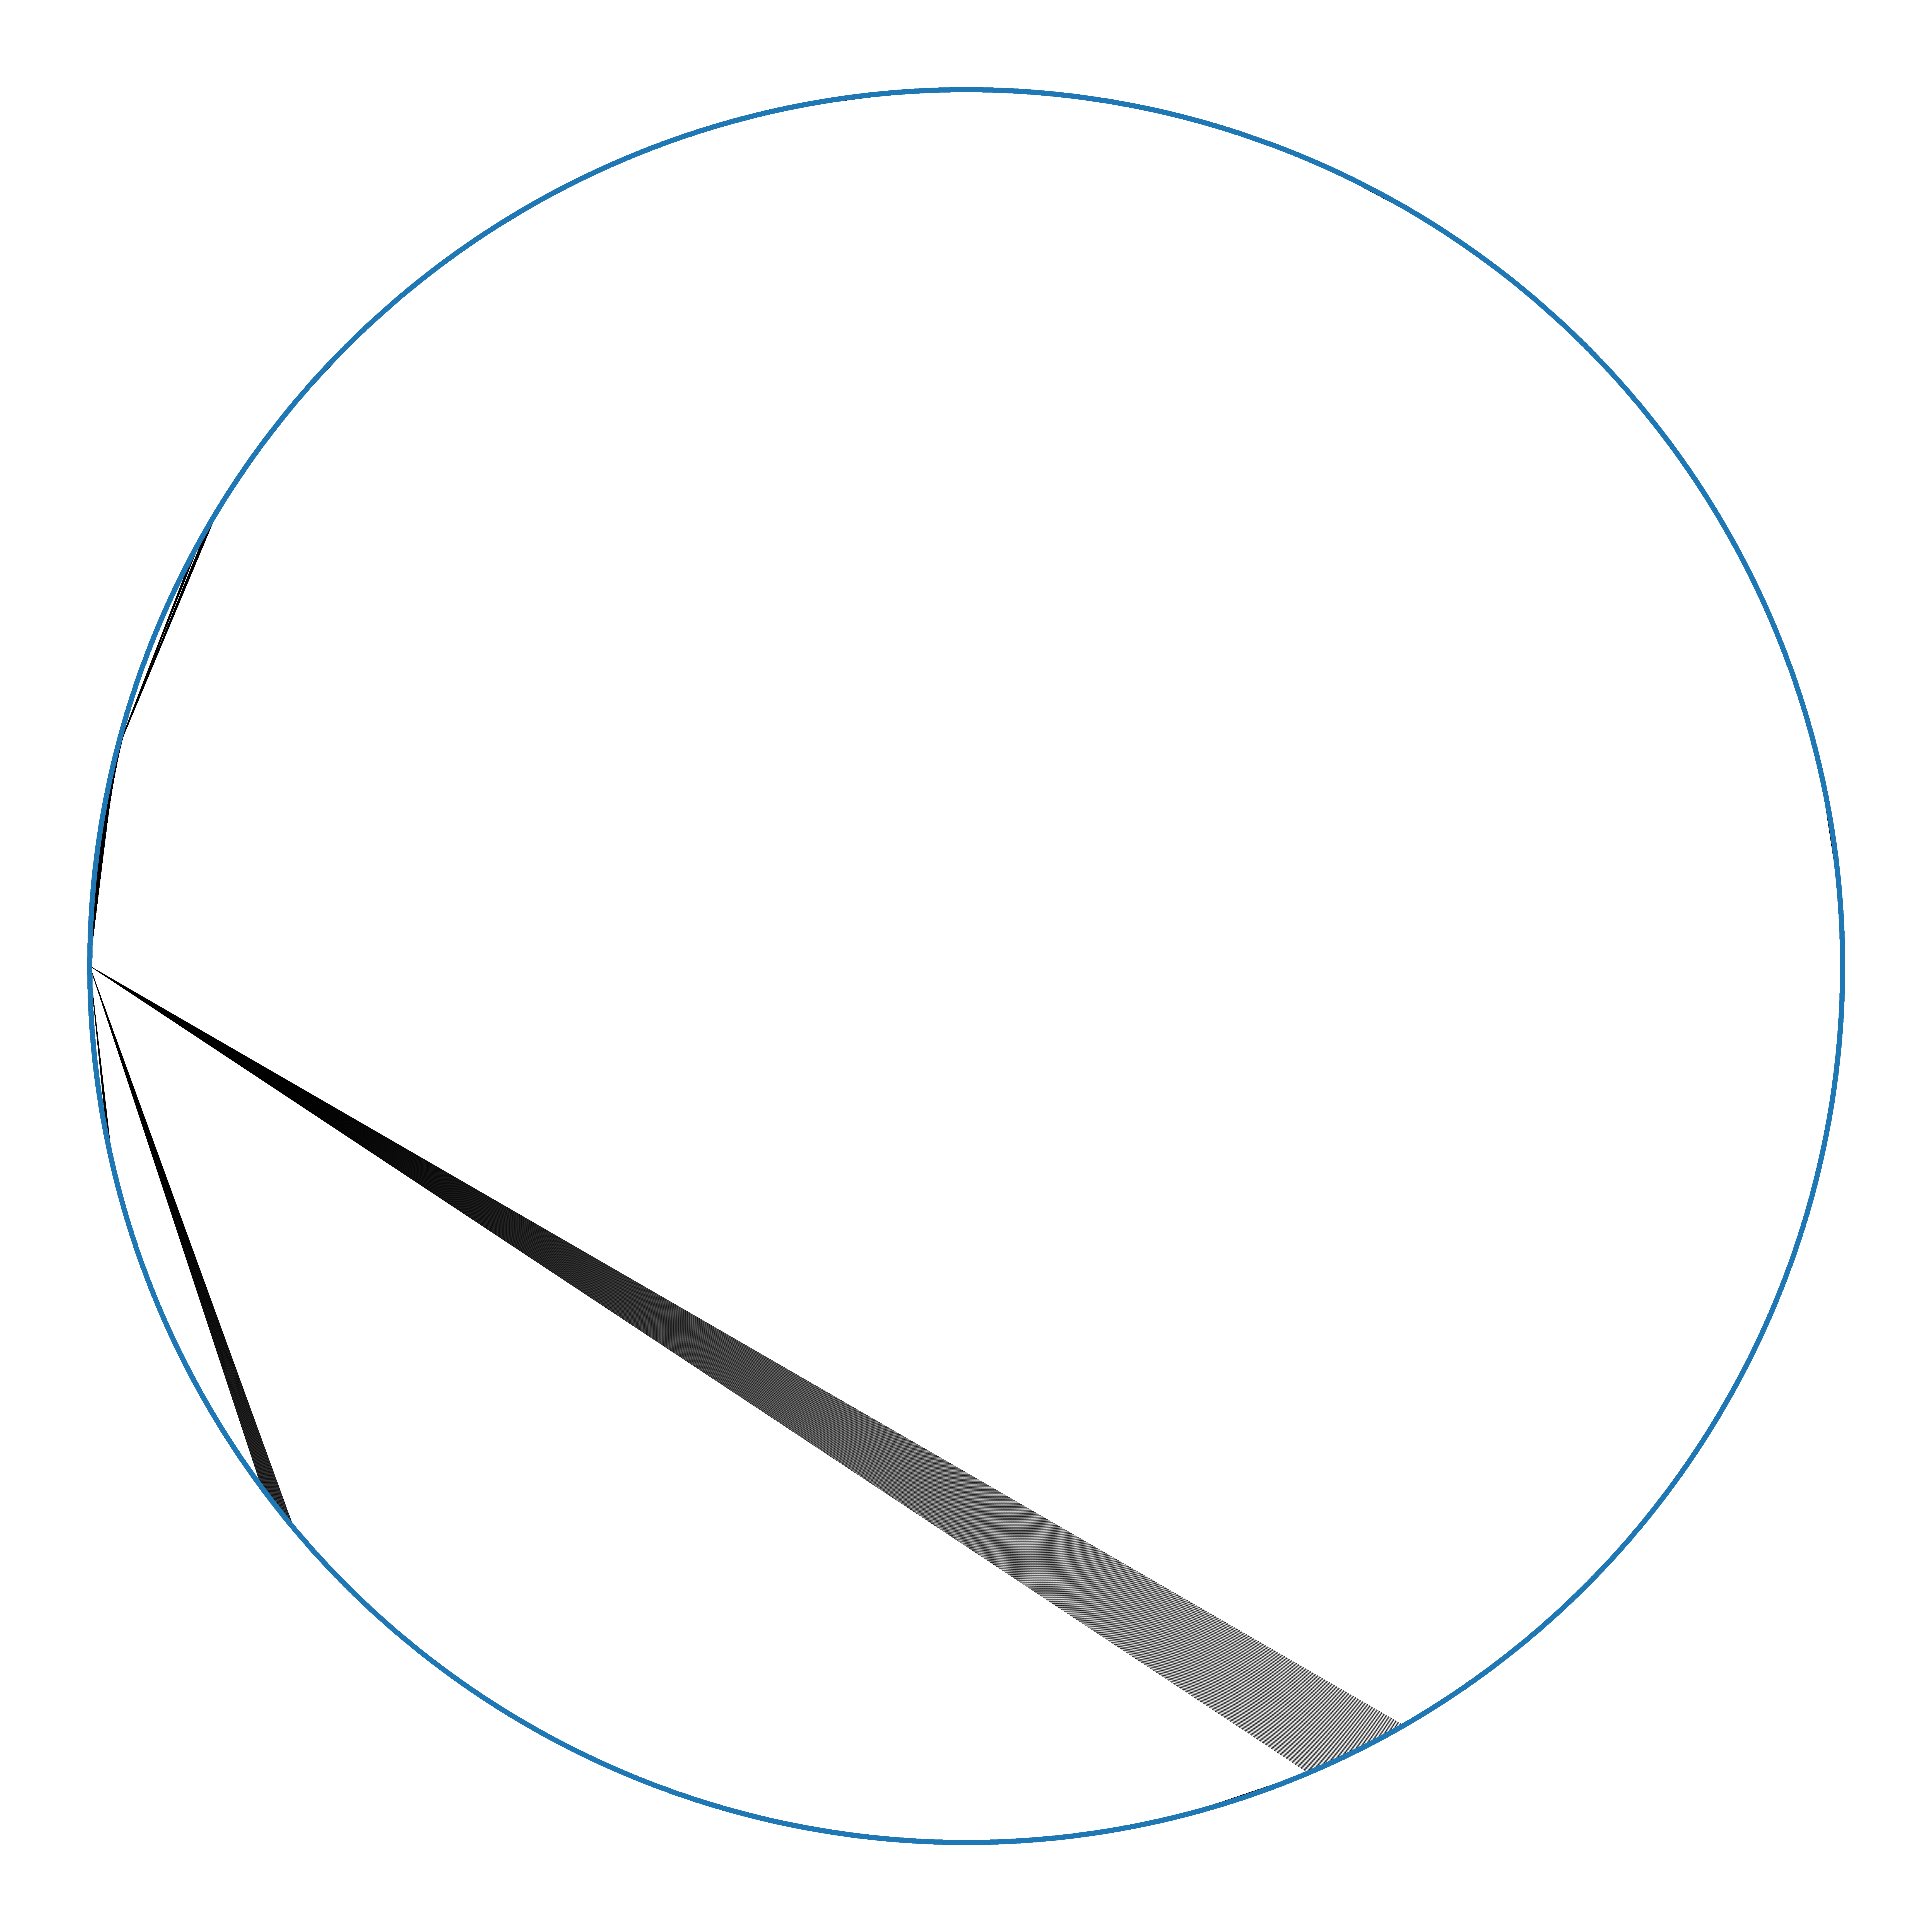

In [16]:
G = nx.Graph(input_data.values)
pos = nx.shell_layout(G)
plt.figure(3,figsize=(96, 96)) 
nx.draw(G, pos)
# edge_labels = dict( ((u, v), d["weight"]) for u, v, d in G.edges(data=True) )
# nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

# nx.draw(G,pos,node_size=200, labels=labels, with_labels=True)
plt.show()